# Regressão Softmax com dados do MNIST - PyTorch

## Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from IPython.display import display
%matplotlib inline
from keras.datasets import mnist

import pandas as pd

Using TensorFlow backend.


## Funções já discutidas em notebooks anteriores

In [2]:
def oneHotIt(Y, n_classes):
    ones = torch.sparse.torch.eye(n_classes)
    return ones.index_select(0,Y)

def softmax(Z):
    EZ = torch.exp(Z)
    S = EZ / torch.sum(EZ, 1, keepdim=True) # normaliza nas classes - colunas
    return S

def predict(X,WT):
    Y_hat_oh = softmax(X.mm(WT))
    values, Y_hat = torch.max(Y_hat_oh, 1)
    return Y_hat

def getAccuracy(X,WT, Y):
    Y_hat = predict(X,WT)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

## Carregamento dos dados do MNIST, disponível no `Keras`.

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## Organizando e normalizando os dados

In [9]:
n_train = 1000
n_test = 200

Y = torch.from_numpy(Y_train[:n_train]).type(torch.LongTensor)
Y_oh = oneHotIt(Y,10)

X = torch.from_numpy(X_train[:n_train].reshape((-1,28*28))/255.).type(torch.FloatTensor)
ones = torch.ones(n_train,1)
ones = ones.type(torch.FloatTensor)
X_bias = torch.cat((ones, X), 1)

testY = torch.from_numpy(Y_test[:n_test]).type(torch.LongTensor)
testX = torch.from_numpy(X_test[:n_test].reshape((-1,28*28))/255.).type(torch.FloatTensor)
ones = torch.ones(n_test,1)
ones = ones.type(torch.FloatTensor)
testX_bias = torch.cat((ones, testX), 1)

print('X.shape:', X.shape)
print('Y.shape:', Y.shape)
print('Y_oh.shape:', Y_oh.shape)

X.shape: torch.Size([1000, 784])
Y.shape: torch.Size([1000])
Y_oh.shape: torch.Size([1000, 10])


## Visualizando uma imagem com o matplotlib

class: 5


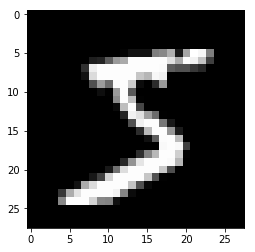

In [5]:
nX = X[0].numpy()
plt.imshow(np.reshape(nX,(28,28)),cmap = 'gray') # retirando primeira coluna (bias no W)
print('class:',Y[0])

## Laço principal - treinamento

In [6]:
n_amostras = X_bias.shape[0]
n_atributos = X_bias.shape[1]
n_classes = 10
WT = torch.zeros(n_atributos,n_classes)
epochs = 1000
learningRate = 0.5
losses = []
for i in range(epochs):
    Z = X_bias.mm(WT)
    Y_oh_hat = softmax(Z)
    loss = (-1. / n_amostras) * torch.sum(Y_oh * torch.log(Y_oh_hat))
    Grad = (-1. / n_amostras) * (X_bias.t()).mm(Y_oh - Y_oh_hat)
    WT = WT - (learningRate * Grad)
    losses.append(loss)
print('Final loss:',loss)

Final loss: 0.045340402387347024


## Visulizando gráfico de perda durante o treinamento

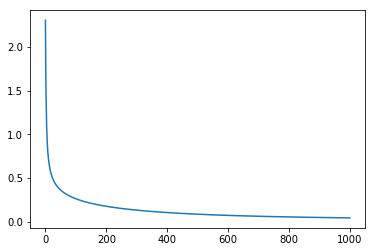

In [7]:
plt.plot(losses)

## Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de testes

In [10]:
def getAccuracy(X,WT, Y):
    Y_hat = predict(X,WT)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

print('Training Accuracy: ', getAccuracy(X_bias,WT,Y))
print('Test Accuracy: ', getAccuracy(testX_bias,WT,testY))

Training Accuracy:  1.0
Test Accuracy:  0.905


## Matriz de confusão com dados de treinamento e teste

In [14]:
print('Matriz de confusão (Treino):')
display(pd.crosstab(predict(X_bias,WT).numpy(), Y.numpy()))

print('Matriz de confusão (Teste):')
display(pd.crosstab(predict(testX_bias,WT).numpy(), testY.numpy()))

Matriz de confusão (Treino):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,0,0,0,0,0,0,0,0
1,0,116,0,0,0,0,0,0,0,0
2,0,0,99,0,0,0,0,0,0,0
3,0,0,0,93,0,0,0,0,0,0
4,0,0,0,0,105,0,0,0,0,0
5,0,0,0,0,0,92,0,0,0,0
6,0,0,0,0,0,0,94,0,0,0
7,0,0,0,0,0,0,0,117,0,0
8,0,0,0,0,0,0,0,0,87,0


Matriz de confusão (Teste):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,16,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,0,0
2,0,0,13,1,0,1,1,0,0,0
3,1,0,1,13,0,0,0,2,0,1
4,0,0,1,0,24,0,0,1,0,0
5,0,0,0,2,0,19,0,0,0,0
6,0,0,1,0,2,0,19,0,0,0
7,0,0,0,0,0,0,0,20,0,1
8,0,0,0,0,0,0,0,0,10,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

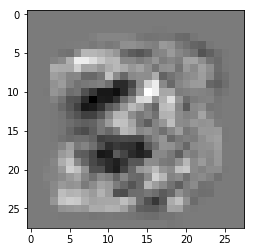

In [16]:
# Visualizando pesos da classe 3
plt.imshow((WT[1:,3].numpy()).reshape((28,28)),cmap = 'gray')